# WIP

## Table of Contents

## 1. Introduction

The idea of this project is that we want to try and predict the stock price of Telenor ASA. We are going to try to make a model that takes in several variables and uses them to make a prediction as precise as possible. Of the variables we incorporate in our model at the start of this project, we will analyze which of them make the model better and eliminate the rest.
We acknowledge that making precise predictions about Telenor’s stock price is rather far fetched, seeing that if it were this easy people all over the world would do the same, but we want to give VictÅÅÅr a huge challenge. 


## 2. Data Handling

### a. Finding appropriate dataset

### b. Creating our dataset

In [126]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import pandasdmx as sdmx
from pyjstat import pyjstat
import requests

In [127]:
stocks = ['^GSPC', "^VIX" , 'BZ=F', 'DNB.OL',"FDX", 'TEL.OL', 'EQNR.OL', "MOWI.OL"]
f = web.DataReader(stocks, 'yahoo',start='2010-01-01',end='2022-09-30')
df = f[[("Close", s) for s in stocks]]
df.columns = df.columns.droplevel(level=0)
df.reset_index(inplace=True)

In [128]:
df.tail()

Symbols,Date,^GSPC,^VIX,BZ=F,DNB.OL,FDX,TEL.OL,EQNR.OL,MOWI.OL
3285,2022-09-26,3655.040039,32.259998,84.059998,176.000000,142.899994,103.449997,344.450012,173.449997
3286,2022-09-27,3647.290039,32.599998,86.269997,177.000000,144.949997,106.550003,352.799988,170.050003
3287,2022-09-28,3719.040039,30.180000,89.320000,174.449997,149.990005,104.400002,353.799988,137.899994
3288,2022-09-29,3640.469971,31.840000,88.489998,169.300003,152.309998,101.500000,348.950012,133.550003
3289,2022-09-30,3585.620117,31.620001,87.959999,172.850006,148.470001,99.660004,358.100006,138.500000


In [129]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
stocksmonthly = df.resample('1M').mean()

In [130]:
stocksmonthly.rename(columns={"DNB.OL" : "DNB"}, inplace=True)
stocksmonthly.rename(columns={"MOWI.OL" : "MOWI"}, inplace=True)
stocksmonthly.rename(columns={"TEL.OL" : "TEL"}, inplace=True)
stocksmonthly.rename(columns={"EQNR.OL" : "EQNR"}, inplace=True)
stocksmonthly.rename(columns={"^GSPC" : "SP500"}, inplace=True)
stocksmonthly.rename(columns={"^VIX" : "VIX"}, inplace=True)
stocksmonthly.rename(columns={"BZ=F" : "BRENT_SPOT"}, inplace=True)

In [131]:
stocksmonthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2010-01-31 to 2022-09-30
Freq: M
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       153 non-null    float64
 1   VIX         153 non-null    float64
 2   BRENT_SPOT  153 non-null    float64
 3   DNB         152 non-null    float64
 4   FDX         153 non-null    float64
 5   TEL         153 non-null    float64
 6   EQNR        153 non-null    float64
 7   MOWI        153 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


In [132]:
stocksmonthly["DNB"] = (stocksmonthly["DNB"].ffill()+stocksmonthly["DNB"].bfill())/2

In [133]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [134]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2010M01",
          "2010M02",
          "2010M03",
          "2010M04",
          "2010M05",
          "2010M06",
          "2010M07",
          "2010M08",
          "2010M09",
          "2010M10",
          "2010M11",
          "2010M12",
          "2011M01",
          "2011M02",
          "2011M03",
          "2011M04",
          "2011M05",
          "2011M06",
          "2011M07",
          "2011M08",
          "2011M09",
          "2011M10",
          "2011M11",
          "2011M12",
          "2012M01",
          "2012M02",
          "2012M03",
          "2012M04",
          "2012M05",
          "2012M06",
          "2012M07",
          "2012M08",
          "2012M09",
          "2012M10",
          "2012M11",
          "2012M12",
          "2013M01",
          "2013M02",
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [135]:
result = requests.post(POST_URL, json = payload)

In [136]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

In [137]:
stocksmonthly["Monthly_KPI"] = KPI_JA["value"].values

In [138]:
rate = pd.read_csv("https://data.norges-bank.no/api/data/IR/M.KPRA.SD.R?apisrc=qb&format=csv&startPeriod=2010-01-01&endPeriod=2022-09-01&locale=no&bom=include", sep=";", decimal=",")

In [139]:
rate.head()

,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
0,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-01,1.75,NaN,NaN
1,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-02,1.75,NaN,NaN
2,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-03,1.75,NaN,NaN
3,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-04,1.75,NaN,NaN
4,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-05,1.96,NaN,NaN


In [140]:
stocksmonthly["Policy_Rate"] = rate["OBS_VALUE"].values

In [142]:
stocksmonthly["Monthly_KPI_Change_PCT"] = stocksmonthly.Monthly_KPI.pct_change()*100

In [143]:
stocksmonthly["TEL_PCT_Change"] = stocksmonthly["TEL"].pct_change()*100

In [144]:
stocksmonthly["TEL_IS_POS"] = np.where(stocksmonthly.TEL_PCT_Change>0, 1, 0)

In [148]:
stocksmonthly.head()

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,Monthly_KPI_Change_PCT,TEL_PCT_Change,TEL_IS_POS
Date,,,,,,,,,,,,,
2010-01-31,1123.581582,20.643158,77.008421,66.472499,83.260000,79.355000,142.719999,46.971000,91.1,1.75,NaN,NaN,0
2010-02-28,1089.159989,22.540000,74.909999,64.467500,80.504211,75.627500,132.040000,52.585000,92.4,1.75,1.427003,-4.697247,0
2010-03-31,1152.048690,17.767391,79.931304,67.847826,88.973478,79.454348,136.443479,51.529565,92.8,1.75,0.432900,5.060128,1
2010-04-30,1197.316185,17.424286,85.753810,68.315789,91.950001,84.192105,144.047369,54.081579,93.0,1.75,0.215517,5.962867,1
2010-05-31,1125.062006,31.929500,76.664737,65.055555,85.434000,80.877778,134.416667,54.419445,92.5,1.96,-0.537634,-3.936624,0


## 3. Data insight and visualization

### Graph

### Scatterplot

### Histogram

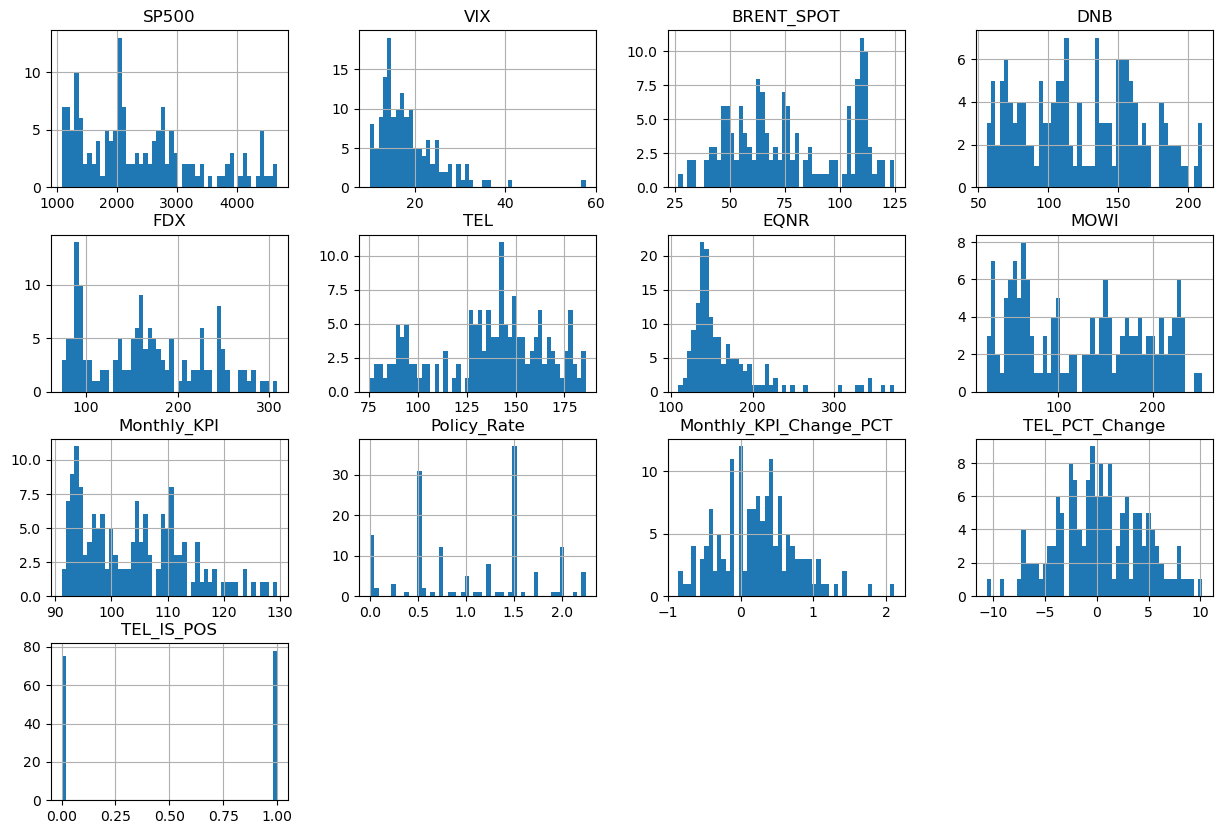

In [146]:
stocksmonthly.hist(bins=50, figsize=(15,10))
plt.show()

### Joint distribution

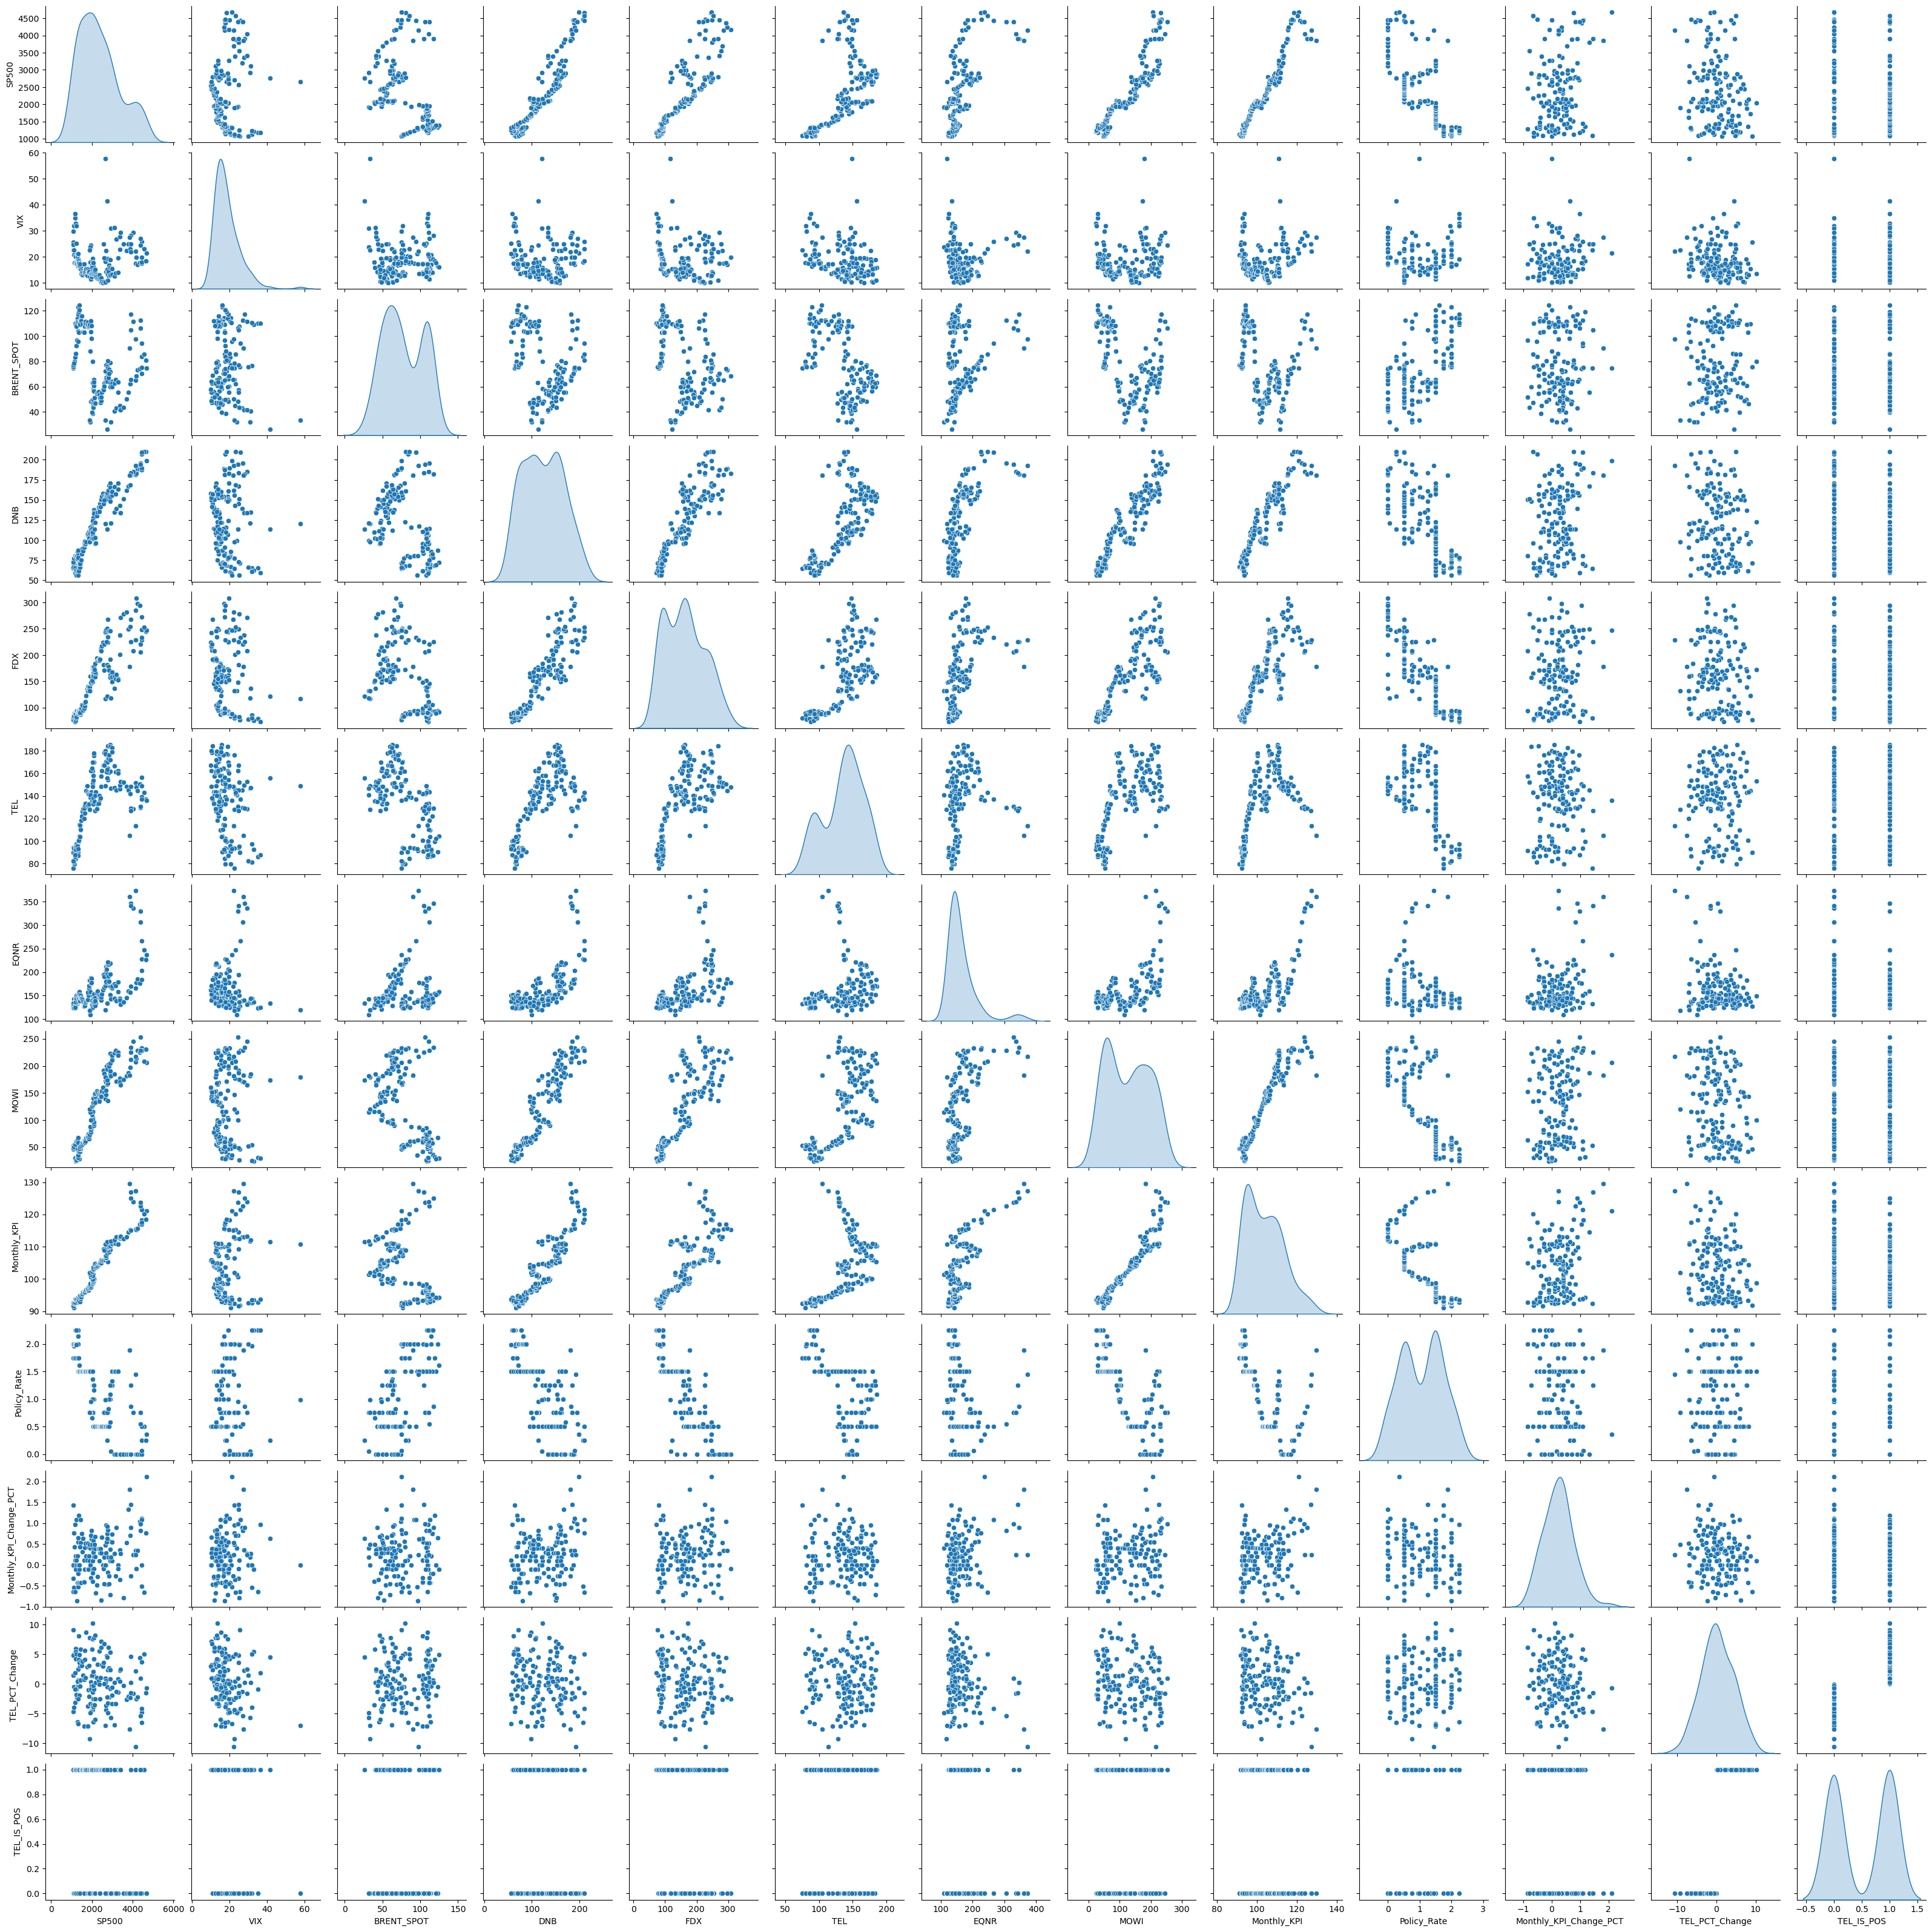

In [147]:
sns.pairplot(stocksmonthly, diag_kind='kde')
plt.show()

### Boxplots

## 4. Basic statistics

### Mean and median

### Minimum and maximum values

### Standard deviation and average deviation

### Quantiles and percentiles

### Correlation

## 5. Data preparation for machine learning

## 6. Model training and analysis

## 7. Discussion and implementation

## 8. Conclusion

## 9. References

SSB \
Norges Bank \
Yahoo